Link to kaggle dataset: https://www.kaggle.com/andrewmvd/data-scientist-jobs from user Larxel. Downloaded on 30/06 at roughly 9:15am.

Link to Stackoverflow dataset: https://insights.stackoverflow.com/survey - downloaded 2020 survey results.


### Idea
Compare Data Scientist and Data Analyst role profiles by required skills

### Reasoning
For people at the beginning of their career in data, it can be difficult to understand the difference between data scientist and data analyst roles. What is the day to day like? How much coding will I be doing? Having recently applied for jobs again myself, I find that the definition varies a lot between companies. Some, one might even argue, advertise using the "data scientist" title because it sounds more "sexy". So what is the difference? How clear-cut is it? And what skills are needed to land a job?

A lot of what you do in a job day to day is defined by the technology you work with. The technology is also an indicator for how much code you will actually be writing and how "technical" a role is. I am therefore looking at the technology that's being used by data analysts versus data scientists to understand where the differences lie. I will be looking at two data sources: First, I will look at job descriptions to understand what skills are crucial to put on your CV to score a job in either field and how this differs. Secondly, I will have a look at the stackoverflow developer survey 2020 to understand which tools data analysts and data scientists use most and are planning to learn. 
Between these two analyses, we should be able to see the differences between Data Analyst and Data Scientist jobs. Also, we should be able to see if the reality of the jobs matches the job descriptions.

##### Questions:
* How distinctive are these roles from each other and from other roles in the field? 
    
Looking only at the roles of Data Analysts and Data Scientists, 81% of people in the field say they are only one of the two. 19% state they are both. THis looks like people working in these roles seem to distinguish them quite clearly from one another. 

However, only a small share of Data Analysts and Data Scientists does not also consider themselves as working in another role. Data Analysts declare on average more other roles than Data Scientists. Those who state they are Data Analysts (but not Data Scientists) list on average 5.1 roles, whereas those who state they are Data Scientists (but not Data Analysts) list 3.9 roles.

Data Analysts often also work as back-end Developers (57%), full-stack Developers (48%) or Database Administrators (38%). Only in 5th place with 31% comes 'Data Scientist or Machine Learning Specialist'.
Data Scientists similarly also work as back-end Developers (47%) and full-stack Developers (37%). In third place comes 'Data or business analyst' with 32%.

The biggest differences between Data Analysts and Data Scientists are for the roles Scientist and Academic Researcher (Data Scientist +12%pts) and Database Administrator, front-end Developer and desktop and enterprise applications Developer (Data Analyst +20%pts, +14%pts, +13%pts)

The data unfortunately provides no insights into which role respondents consider their "primary" role. It is therefore quite possible that many consider themselves as Data Analysts, because data analysis is part of another, *primary* role they fulfil (likely a Developer role). Data Scientist, in comparison, seems to be somewhat more of a "standalone" role.

What does this mean for aspiring Data Analysts? Will they always have to wear multiple hats and even bring developer skills to the table? Or is the stackoverflow data biased towards developers who also do data analysis and does not actually capture many "pure" Data Analysts? Based on my own recent job search, the latter seems more likely. 

> Data Analysis skills are important in many roles

> Data Scientist is a more "standalone" role, at least in the Stackoverflow/Developer world

* What tools are Data Analysts using versus what tools are Data Scientists using (Stackoverflow)?

Data Analysts are stronger on the SQL side, wherras DS use more Python (+ libraries)

* What are they each looking to start using next year (Stackoverflow)? Is either group trying to learn more about the "other group's" tools?

What they want to use in the next year largely reflects what they are already using

* Do job descriptions reflect this difference accurately? What skills are required according to job descriptions (Kaggle) and does this match what we see from Stackoverflow?

Python and R for DS, Excel, Tableau for Data Analyst. SQL required in both.

### Further analysis:
* Bring the two analyses together: Are job ads acurately reflecting what is used in the job? E.g. job ads say DS use 80 SQL, but in reality it is only 50% (this is just an example). Finding would be: Job ads suggest you will be doing more/less of this than you probably will in the end.

### Possible further improvement of existing analysis:
* Different charts
* Statistical analysis of % differences - are they significant/for which tools are they significant?


### Other questions
* Do DS or DA desire to use more new tools next year?
* Do people in smaller companies have to take on more different roles?
* Kaggle: Do requirements become more similar or more different the more senior a role gets?
* Is job satisfaction higher amongst Data Scientists?
* Do Data Analysts try to learn tools that are used more by data scientists?
* Which other roles do the DSs and DAs usually also fulfill? >> Done, could potentially make a nicer chart


# Preparations

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import networkx as nx
from scipy.stats import ttest_ind_from_stats

In [2]:
os.chdir(r"C:\Users\j\Documents\udacity-ds-nanodegree\assignment1\data")

In [3]:
pd.set_option("display.max_columns", None)

## Reading in data

In [4]:
dfk = pd.read_csv(
    r"C:\Users\j\Documents\udacity-ds-nanodegree\assignment1\data\kaggle_ds_jobs\DataScientist.csv")

In [5]:
dfs = pd.read_csv(r"stackoverflow_survey\survey_results_public.csv")

## Defining functions

In [6]:
def subset_creator(df, column_list):
    '''
    INPUT:
    df: full dataframe
    column_list: list of columns from which unique string values need to e extracted

    OUTPUT:
    super_list2: list that contains each unqiue value from the columns in column_list once

    What the function does:
    The functions takes in columns which contain string values, 
    where each row multiple can contained multiple values separated by a delimiter (e.g. 'dog;cat;rabbit').
    The function extracts all unique strings values from all columns from column_list and returns them in super_list2.
    Each value is only contained once in super_list2.
    '''
    df = df.fillna('No information')
    super_list = []
    for i in column_list:
        nested_list = list(df[i].str.split(';'))
        flat_list = [item for sublist in nested_list for item in sublist]
        all_set = set(flat_list)
        all_list = list(all_set)
        super_list.append(all_list)
    super_list = [item for sublist in super_list for item in sublist]
    super_list_all_set = set(super_list)
    super_list_all_list = list(super_list_all_set)
    super_list2 = [i for i in super_list_all_list if i != 'No information']
    return super_list2

In [7]:
def grouping_formatting(df, column):
    '''
    INPUT:
    df: df to be reformatted
    column: To set column name

    Output:
    Reformatted dataframe

    What this function does:
    This function reformats the dataframe after running groupby. It is used inside the grouping function.
    '''
    df = df.reset_index()
    df = df.drop(columns=[0], axis=1)
    df = df.rename(columns={"index": "Categories", 1: column})
    return df

In [8]:
def grouping(df, all_items, column, bs):
    '''
    INPUT:
    df: dataframe with all data
    all_devtypes: list of all different Developer roles
    column: binary coded column
    bs: True/False value deciding whether to include base sizes

    OUTPUT:
    df_cooc: grouped by df that is transposed and contains column % based on total and - if wanted - base sizes

    What this function does:
    Relevant for all 2-way split analyses to generate the co-occurence dataframe
    1. Save the base size n for DevType of interest
    2. Create new df by running groupby, immediately followed by transposing and dividing counts by n
    3. Tidying up the new df using grouping_formatting function
    4. Adding in base size if requested
    '''
    n = df[column].sum()
    df_cooc = df.groupby([column])[all_items].sum().transpose()/n
    df_cooc = grouping_formatting(df_cooc, column)
    if bs:
        df_bs = df.groupby([column])[all_items].sum().transpose()
        df_bs = grouping_formatting(df_bs, column)
        # changing column names to indicate it is base size
        bs_columns = list(df_bs.columns)
        bs_columns.remove("Categories")
        for i in bs_columns:
            df_bs = df_bs.rename(columns={i: i+"_bs"})
        # merging
        df_cooc = pd.merge(
            df_cooc, df_bs, left_on='Categories', right_on='Categories')
    return df_cooc

In [9]:
def dummies(df, column_list):
    '''
    INPUT:
    df: dataframe with all data
    column_list: All columns for which dummies need to be created

    OUTPUT:
    df: df with new dummy columns
    issue_list: list of all duplicate columns

    What this function does:
    Creates dummy columns for categorical variables and deal with duplicates if needed
    '''

    for i in column_list:
        df_interim = df[i].str.get_dummies(sep=';')
        df = pd.merge(df, df_interim, left_index=True, right_index=True)

    # --------------------------------------------------------------------#
    # ------------Removing duplicated columns if they exist---------------#
    # --------------------------------------------------------------------#

    # NOTE: this works only on duplicates, not on triplicates and higher
    header_list = df.columns
    # finding all duplicated columns that end in _x and _y
    issue_list = [i for i in header_list if re.match('.+_\D$', i)]

    if issue_list:
        issue_list = sorted(issue_list)
        n_iter = int(len(issue_list)/2)  # establishing number of pairs
        iter_list = []
        j = 0

        for i in range(n_iter):  # creating list of even numbers based on number of issue pairs
            iter_list.append(i+j)
            j += 1

        for i in iter_list:  # adding columns up, dropping old columns
            a = issue_list[i]
            b = issue_list[i+1]
            b_new = b[:-2]  # creating new column name
            df[b_new] = df[a] + df[b]
            df.loc[df[b_new] > 1, b_new] = 1
            #df = df.drop(columns = [a, b], axis = 1)

    return df, issue_list

In [10]:
def t_testing(df, dvar, sample1, sample2, base1, base2, removal_list):
    '''
    INPUT:
    df: dataframe with all data
    dvar: list of all dependent variables
    sample1/sample2: string to define name of sample and column that contains mean score (e.g. DA_share)
    base1/base2: base sizes for both samples
    removal_list: name of dev_roles that constitue samples 1 and 2

    OUTPUT:
    result_dict: dictionary with results of t-tests

    What this function does:
    1. runs two sample t-tests for independent samples and returns test statistic and p-value
    '''
    result_dict = {}
    reduced_dvar = [i for i in dvar if i not in removal_list]
    for i in reduced_dvar:
        mean1 = df.loc[i, sample1]
        mean2 = df.loc[i, sample2]
        std1 = np.sqrt(mean1*(1-mean1))
        std2 = np.sqrt(mean2*(1-mean2))
        t_result = ttest_ind_from_stats(mean1=mean1,
                                        std1=std1,
                                        nobs1=base1,
                                        mean2=mean2,
                                        std2=std2,
                                        nobs2=base2)
        result_dict[i] = {
            'test_statistic': t_result[0], 'p-value': t_result[1]}
        df_result = pd.DataFrame(result_dict).transpose()

        # calculating adjusted alpha
        bonferroni_adj = 0.05/len(dvar)

        # creating list of all dvars where different is significant
        sig_dvar = df_result.loc[df_result['p-value'] <= bonferroni_adj]
        sig_dvar = sig_dvar.index.to_list()

        # styling output table
        df_result = df_result.style.apply(lambda x: [
            "background: green" if v <= bonferroni_adj else "" for v in x], subset=['p-value'], axis=1)

    return df_result, bonferroni_adj, sig_dvar

In [11]:
def grouping_1col(dataset, df, key_column, dvar, n_dict):
    '''
    INPUT
    dataset: String, states which dataset is being worked with: Kaggle or Stackoverflow 
    df: dataframe to build grouped data frames from (dfs, dfs_tools, dfk_f)
    key_column: column name as string of column by which groupby happens ('DevType_RoleDescription', 'DevType_RoleDescription', 'Job Title Reduced')
    dvar: list of columns which need to show in grouped table (all_devtypes, all_tools, full_list)
    n_dict: dictionary for base sizes

    OUTPUT:
    df: grouped dataframe with base sizes and endorsement/co-occurence shares

    What this function does:
    Returns a grouped dataframe with base sizes and shares for cases where groupby needs to happen only by one column

    '''

    # Creating a co-occurence table
    df_cooc = df.groupby(key_column)[dvar].sum().transpose()

    # Adding % columns into the co-occurence table
    for key in n_dict:
        col_name = str(key+'_share')
        n = n_dict[key]
        df_cooc[col_name] = df_cooc[key]/n

    # Create Difference column
    if dataset == 'Stackoverflow':
        df_cooc['Difference'] = df_cooc['DS_only_share'] - \
            df_cooc['DA_only_share']
    elif dataset == 'Kaggle':
        df_cooc['Difference'] = df_cooc['DS_share'] - df_cooc['DA_share']
    else:
        print("The dataset submitted is unknown")

    return df_cooc

In [12]:
def sig_stars(df, sig_dvar):
    '''
    INPUT
    df: grouped dataset
    sig_dvar: list of all variables where difference in groups was statistically significant

    OUTPUT:
    df: same as input, but with sig stars in index column

    What this function does:
    This function adds significance stars to the grouped table, so that at charting stage it is visible which differences are significant
    '''
    df = df.reset_index()
    df.loc[df['index'].isin(sig_dvar), 'index'] = df['index'].apply(
        lambda x: "{}{}".format(x, '**'))
    df = df.set_index('index')
    return df

In [13]:
def plotting(df, hue1, hue2, ylabel, xlabel, title, legend1, legend2):
    # Creating horizontal bar chart to show differences
    fig, ax1 = plt.subplots()

    # Plotsize
    plt.rcParams["figure.figsize"] = [10, 15]

    # Styling
    plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
    plt.rcParams['axes.edgecolor'] = '#333F4B'
    plt.rcParams['axes.linewidth'] = 0.8
    plt.rcParams['xtick.color'] = '#333F4B'
    plt.rcParams['ytick.color'] = '#333F4B'

    # Actual plot
    # Select colours here: https://www.rapidtables.com/web/color/RGB_Color.html
    df[[hue1, hue2,
        'Difference']].sort_values(by=['Difference']).plot.barh(ax=ax1, color={hue1: '#2230AF', hue2: '#6699FF', 'Difference': '#DA1F26'})

    # Grid
    ax1.grid(axis='x')
    ax1.set_axisbelow(True)

    # Labels
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)

    # legend
    plt.legend([legend1, legend2, 'Difference'])

    # Colour of axis labels and header
    ax1.xaxis.label.set_color('#333F4B')
    ax1.yaxis.label.set_color('#333F4B')
    ax1.title.set_color('#333F4B')
    ax1.title.set_size(14)

    plt.show

In [14]:
def merging_2col(df1, df2):
    df = pd.merge(df1,
                  df2,
                  left_on='Categories',
                  right_on='Categories')

    df = df.set_index('Categories')
    return df

In [15]:
def diffcol_2col(df):
    df['Difference'] = df['Data scientist or machine learning specialist'] - \
        df['Data or business analyst']
    return df

In [16]:
def endorsement(min_end, df, c1, c2):
    df = df.loc[(df[c1] > min_end) | (df[c2] > min_end)]
    return df

# Part 1 - The Stackoverflow Data

## Inspecting data

In [17]:
dfs.head(5)

Respondent                                         MainBranch Hobbyist  \
0           1                     I am a developer by profession      Yes   
1           2                     I am a developer by profession       No   
2           3                        I code primarily as a hobby      Yes   
3           4                     I am a developer by profession      Yes   
4           5  I used to be a developer by profession, but no...      Yes   

    Age Age1stCode CompFreq  CompTotal  ConvertedComp             Country  \
0   NaN         13  Monthly        NaN            NaN             Germany   
1   NaN         19      NaN        NaN            NaN      United Kingdom   
2   NaN         15      NaN        NaN            NaN  Russian Federation   
3  25.0         18      NaN        NaN            NaN             Albania   
4  31.0         16      NaN        NaN            NaN       United States   

     CurrencyDesc CurrencySymbol DatabaseDesireNextYear  \
0   European Euro            EUR   Microsoft SQL Server   
1  Pound sterling            GBP                    NaN   
2             NaN            NaN                    NaN   
3    Albanian lek            ALL                    NaN   
4             NaN            NaN       MySQL;PostgreSQL   

                          DatabaseWorkedWith  \
0  Elasticsearch;Microsoft SQL Server;Oracle   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4              MySQL;PostgreSQL;Redis;SQLite   

                                             DevType  \
0  Developer, desktop or enterprise applications;...   
1            Developer, full-stack;Developer, mobile   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                           EdLevel  \
0  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2                                              NaN   
3  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
4     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                          Employment  \
0  Independent contractor, freelancer, or self-em...   
1                                 Employed full-time   
2                                                NaN   
3                                                NaN   
4                                 Employed full-time   

                      Ethnicity Gender  \
0  White or of European descent    Man   
1                           NaN    NaN   
2                           NaN    NaN   
3  White or of European descent    Man   
4  White or of European descent    Man   

                                          JobFactors                 JobSat  \
0  Languages, frameworks, and other technologies ...     Slightly satisfied   
1                                                NaN      Very dissatisfied   
2                                                NaN                    NaN   
3  Flex time or a flexible schedule;Office enviro...  Slightly dissatisfied   
4                                                NaN                    NaN   

                                             JobSeek  \
0       I am not interested in new job opportunities   
1       I am not interested in new job opportunities   
2                                                NaN   
3  I’m not actively looking, but I am open to new...   
4                                                NaN   

     LanguageDesireNextYear        LanguageWorkedWith  \
0    C#;HTML/CSS;JavaScript    C#;HTML/CSS;JavaScript   
1              Python;Swift          JavaScript;Swift   
2  Objective-C;Python;Swift  Objective-C;Python;Swift   
3                       NaN                       NaN   
4           Java;Ruby;Scala         HTML/CSS;Ruby;SQL   

             MiscTechDesir

In [18]:
print("The original base size is", dfs.shape[0])
print("The number of columns is", dfs.shape[1])

The original base size is 64461
The number of columns is 61


In [19]:
# Inspecting data types and missing values
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

## Filtering  (includes creating dummy variables for DevTypes)

**Sensible filters**

**MainBranch**: Developers by profession; code sometimes as part of their work

**Employment**: Employed full-time; employed part-time; independent contractor, freelancer or self-employed

**DevType**: Not NA >> This is used for grouping sample into Data Analysts and Data Scientists, hence cannot work with null values

**DevType**: Data or business analyst; Data scientist or machine learning specialist >> This is my desired sample

In [20]:
# Filerting on MainBranch
dfs = dfs.loc[(dfs['MainBranch'] == "I am a developer by profession") | (
    dfs['MainBranch'] == "I am not primarily a developer, but I write code sometimes as part of my work")]

In [21]:
# Filtering on Employment status
dfs = dfs.loc[(dfs['Employment'] == "Employed full-time") | (dfs['Employment'] == "Employed part-time")
              | (dfs['Employment'] == "Independent contractor, freelancer, or self-employed")]

In [22]:
# Filerting on DevType = NaN
dfs = dfs.dropna(subset=['DevType'])

In [23]:
# Need to create columns for two professions I am interested in
# https://stackoverflow.com/questions/18889588/create-dummies-from-column-with-multiple-values-in-pandas
dfs_d1 = dfs['DevType'].str.get_dummies(sep=';')

In [24]:
# Merging the dummy dataframe onto the original dataframe
dfs = pd.merge(dfs, dfs_d1, left_index=True, right_index=True)
df_chord = dfs  # this df is needed for the chord chart below >> not filtered on specific dev type

In [25]:
# Filtering on respondents that work as Data Scientist or Data Analyst
dfs = dfs.loc[(dfs['Data or business analyst'] == 1) | (
    dfs['Data scientist or machine learning specialist'] == 1)]

In [26]:
# Checking new base size
print("The new base size after filtering is", dfs.shape[0])

The new base size after filtering is 5952


## Question 2.1.1: How distinctive are the Data Analyst and the Data Scientist roles from each other?

### How many % of people are Data Analysts, how many Data Scientists and how many are both?

In [27]:
dfs['Data or business analyst'].mean()

0.5942540322580645

In [28]:
dfs['Data scientist or machine learning specialist'].mean()

0.5929099462365591

In [29]:
dfs['DA and DS'] = 0
dfs.loc[(dfs['Data or business analyst'] == 1) & (
    dfs['Data scientist or machine learning specialist'] == 1), 'DA and DS'] = 1
dfs['DA and DS'].mean()

C:\Users\j\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\j\Python\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


0.18716397849462366

Creating a variable to identify DAs, DSs and those who are both DA and DS >> Needed for further analysis

In [30]:
dfs['DevType_RoleDescription'] = np.nan
dfs.loc[dfs['DA and DS'] == 1, 'DevType_RoleDescription'] = 'DA_and_DS'
dfs.loc[(dfs['DA and DS'] == 0) & (dfs['Data scientist or machine learning specialist']
                                   == 1), 'DevType_RoleDescription'] = 'DS_only'
dfs.loc[(dfs['DA and DS'] == 0) & (dfs['Data or business analyst']
                                   == 1), 'DevType_RoleDescription'] = 'DA_only'

C:\Users\j\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\j\Python\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\j\Python\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

### Creating base sizes for further analysis

Get base size for each of the three groups (DA only, DS only, DA and DS)

In [31]:
n_da_only = dfs.loc[dfs['DevType_RoleDescription']
                    == 'DA_only']['Respondent'].count()
n_ds_only = dfs.loc[dfs['DevType_RoleDescription']
                    == 'DS_only']['Respondent'].count()
n_da_and_ds = dfs.loc[dfs['DevType_RoleDescription']
                      == 'DA_and_DS']['Respondent'].count()

In [32]:
print("Base size DA only: ", n_da_only)
print("Base size DS only: ", n_ds_only)
print("Base size DA and DS: ", n_da_and_ds)

Base size DA only:  2423
Base size DS only:  2415
Base size DA and DS:  1114


Get base size for two groups (DS, DA >> They have a certain overlap)

In [33]:
n_da = dfs['Data or business analyst'].sum()
n_ds = dfs['Data scientist or machine learning specialist'].sum()

In [34]:
print("Base size DA: ", n_da)
print("Base size DS: ", n_ds)

Base size DA:  3537
Base size DS:  3529


### How distinctive are the DA and DS role from other roles in the field?

In [35]:
# Retrieving all DevTypes from the Stackoverflow data
all_devtypes = subset_creator(dfs, ['DevType'])

#### How many respondents claim to ONLY be a Data Analyst or a Data Scientist?

In [36]:
# Create column that shows number of roles chosen
dfs['NumberOfRoles'] = dfs[all_devtypes].sum(axis=1)

C:\Users\j\Python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
pd.crosstab(dfs['NumberOfRoles'], dfs['DevType_RoleDescription'])

DevType_RoleDescription  DA_and_DS  DA_only  DS_only
NumberOfRoles                                       
1                                0      225      325
2                              164      313      476
3                              174      344      495
4                              151      292      395
5                              124      315      248
6                               98      246      147
7                               85      203      118
8                               56      136       59
9                               52      120       47
10                              40       71       33
11                              25       58       28
12                              33       34       23
13                              21       25       10
14                              16       20        5
15                              16        5        2
16                               9        8        1
17                               9        1        2
18                               5        4        0
19                               5        3        0
20                               4        0        0
21                               1        0        0
22                               2        0        1
23                              24        0        0

#### How many roles do respondents say they fill on average?

In [38]:
dfs.groupby('DevType_RoleDescription')['NumberOfRoles'].mean()

DevType_RoleDescription
DA_and_DS    6.427289
DA_only      5.118035
DS_only      3.892754
Name: NumberOfRoles, dtype: float64

#### What else do they claim to be?

##### Analysis for 3-way split (DA only, DS only, DA and DS)

Creating grouped co-occurence table

In [39]:
# Creating dictionary for base sizes
n_dicts = {'DA_only': n_da_only,
           'DS_only': n_ds_only, 'DA_and_DS': n_da_and_ds}

In [40]:
dfs_cooc1 = grouping_1col('Stackoverflow', dfs,
                          'DevType_RoleDescription', all_devtypes, n_dicts)

Creating heatmap

In [41]:
'''
# Plotting the table using a heatmap
plt.figure(figsize=(10, 10))
ax = sns.heatmap(dfs_cooc1[['DA_share', 'DS_share', 'DA and DS_share']].sort_values(
    by=['DA_share']), annot=True, fmt='.2f')
ax.set_ylim(0, 23)
heatmap = fig
'''

"\n# Plotting the table using a heatmap\nplt.figure(figsize=(10, 10))\nax = sns.heatmap(dfs_cooc1[['DA_share', 'DS_share', 'DA and DS_share']].sort_values(\n    by=['DA_share']), annot=True, fmt='.2f')\nax.set_ylim(0, 23)\nheatmap = fig\n"

Sig testing

In [42]:
removal_list = ['Data or business analyst',
                'Data scientist or machine learning specialist']
dfs_result_devtypes, dfs_result_devtypes_ba, sig_dvar_s_devtypes = t_testing(dfs_cooc1, list(
    dfs_cooc1.index), 'DA_only_share', 'DS_only_share', n_da_only, n_ds_only, removal_list)

Adding sig stars to table pre-charting

In [43]:
dfs_cooc1 = sig_stars(dfs_cooc1, sig_dvar_s_devtypes)

Removing rows from removal_list for charting

In [44]:
for i in removal_list:
    dfs_cooc1 = dfs_cooc1.drop(index=i)

Charting

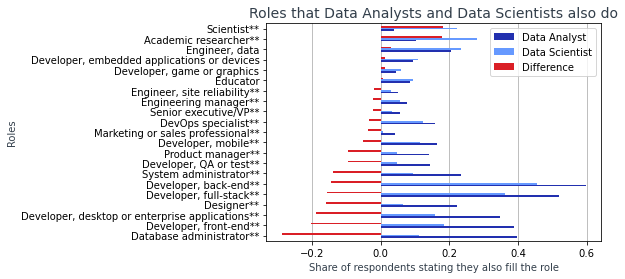

In [45]:
plotting(dfs_cooc1, 'DA_only_share', 'DS_only_share', 'Roles', 'Share of respondents stating they also fill the role',
         'Roles that Data Analysts and Data Scientists also do', 'Data Analyst', 'Data Scientist')

##### Analysis for 2-way split with partial overlap (DA, DS)

In [46]:
# Creating a co-occurence table
# needs to be true to be able to sig-test later
dfs_cooc2_da = grouping(dfs, all_devtypes, 'Data or business analyst', True)
dfs_cooc2_ds = grouping(
    dfs, all_devtypes, 'Data scientist or machine learning specialist', True)  # needs to be true to be able to sig-test later
dfs_cooc2 = merging_2col(dfs_cooc2_da, dfs_cooc2_ds)

# Adding a Difference column
dfs_cooc2 = diffcol_2col(dfs_cooc2)

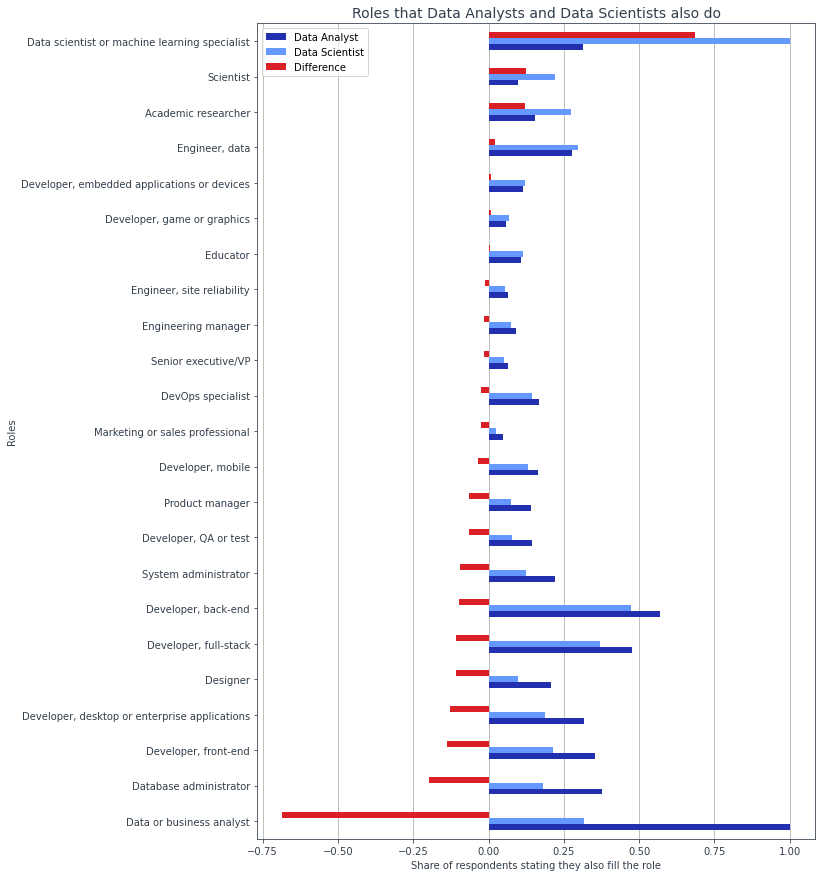

In [47]:
plotting(dfs_cooc2, 'Data or business analyst', 'Data scientist or machine learning specialist', 'Roles',
         'Share of respondents stating they also fill the role', 'Roles that Data Analysts and Data Scientists also do', 'Data Analyst', 'Data Scientist')

## Question 2.1.2: How distinctive are Data Analyst and Data Scientist roles from any other role in general? Creating a chord chart


Notes:
This chart doesn't use the dataset filtered only on Data Analysts and Data Scientist. All DevTypes are included. The size of the node shows the base size for the respective DevType. The arches (and consequently the width of each DevType segment) show which other DevTypes the respondents claim to be as well. That means that a small segment with a large node shows that a smaller share of this DevType claims to also be another DevType, whereas a large segment with a small node shows that people of this DevType claim to also be many other DevTypes.

Problems with modules: 
* Chord: States the rate limit is exceeded
* Bokeh and Holoviews: There is currently no workaround for truncated labels it seems: https://discourse.holoviz.org/t/chord-diagram-labels-got-trancated/663/2

### Creating a co-occurence matrix

In [48]:
df_ng = dfs[all_devtypes]

In [49]:
# https://stackoverflow.com/questions/20574257/constructing-a-co-occurrence-matrix-in-python-pandas
df_ngt = df_ng.T.dot(df_ng)

In [50]:
np.fill_diagonal(df_ngt.values, 0)

Video about Networkx: https://www.youtube.com/watch?v=flwcAf1_1RU

Create an edge list from the cooccurence matrix: https://stackoverflow.com/questions/57456069/how-to-convert-a-co-occurrence-matrix-to-networkx-graph

In [51]:
df_ngt.values[np.tril(np.ones(df_ngt.shape)).astype(bool)] = 0

In [52]:
df_ngt_stacked = df_ngt.stack()

In [53]:
df_ngt_stacked = df_ngt_stacked[df_ngt_stacked >= 1].rename_axis(
    ('node1', 'node2')).reset_index(name='weight')

In [54]:
''' Creating a node and edges graph 
G = nx.from_pandas_edgelist(df_ngt_stacked_f,
                            source='node1',
                            target='node2',
                            edge_attr='weight')
print("No of unique characters:", len(G.nodes))
print("No of connections:", len(G.edges))

# all graph options
graphs_viz_options = [nx.draw, nx.draw_networkx, nx.draw_circular,
                      nx.draw_kamada_kawai, nx.draw_random, nx.draw_shell, nx.draw_spring]

# plot graph option
selected_graph_option = 0

# plot
plt.figure(figsize=(8, 6), dpi=100)
graphs_viz_options[selected_graph_option](G)
'''

' Creating a node and edges graph \nG = nx.from_pandas_edgelist(df_ngt_stacked_f,\n                            source=\'node1\',\n                            target=\'node2\',\n                            edge_attr=\'weight\')\nprint("No of unique characters:", len(G.nodes))\nprint("No of connections:", len(G.edges))\n\n# all graph options\ngraphs_viz_options = [nx.draw, nx.draw_networkx, nx.draw_circular,\n                      nx.draw_kamada_kawai, nx.draw_random, nx.draw_shell, nx.draw_spring]\n\n# plot graph option\nselected_graph_option = 0\n\n# plot\nplt.figure(figsize=(8, 6), dpi=100)\ngraphs_viz_options[selected_graph_option](G)\n'

In [55]:
# https://holoviews.org/reference/elements/bokeh/Chord.html
# https://coderzcolumn.com/tutorials/data-science/how-to-plot-chord-diagram-in-python-holoviews
# Image of what I need re weights/arc thickness: https://think.design/services/data-visualization-data-design/chord-diagram/
import holoviews as hv
from holoviews import opts, dim

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
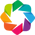

In [56]:
hv.extension('bokeh')
hv.output(size=200)

Retrieve node size data

In [57]:
# https://github.com/holoviz/holoviews/issues/3097

In [58]:
# Need count of all DevTypes (using df_chord which is created at Filtering stage)
df_devtype_count = pd.DataFrame(df_chord[all_devtypes].sum())

In [59]:
df_devtype_count = df_devtype_count.reset_index()

In [60]:
df_devtype_count = df_devtype_count.rename(
    columns={'index': 'DevType', 0: 'size'})

In [61]:
df_devtype_count['size'] = df_devtype_count['size'] / \
    500  # Reducing for nodes to have sensible sizes

In [62]:
df_devtype_count

DevType    size
0                 Marketing or sales professional   0.984
1   Developer, desktop or enterprise applications  21.864
2                                       Scientist   3.666
3                                  Engineer, data   6.832
4                            System administrator   9.296
5   Data scientist or machine learning specialist   7.058
6                             Academic researcher   6.114
7                             Senior executive/VP   2.274
8                             Engineering manager   4.860
9                            Developer, front-end  33.512
10                    Developer, game or graphics   4.696
11                         Database administrator  10.446
12                                Product manager   4.328
13                                       Designer   9.064
14                              Developer, mobile  17.154
15                          Developer, QA or test   7.264
16                          Developer, full-stack  50.660
17    Developer, embedded applications or devices   8.722
18                            Developer, back-end  50.654
19                              DevOps specialist  11.390
20                       Data or business analyst   7.074
21                                       Educator   5.048
22                     Engineer, site reliability   3.588

Create nodes data

In [63]:
nodes = pd.DataFrame(all_devtypes)
nodes = nodes.rename(columns={0: 'name'})

In [64]:
nodes = pd.merge(nodes, df_devtype_count, left_on='name', right_on='DevType')

In [65]:
nodes = nodes.drop(['DevType'], axis=1)

In [66]:
nodes = hv.Dataset(nodes, 'index')  # Turning Dataframe into a Dataset

Format edge-list dataframe

In [67]:
# Get a dictionary of index and name
node_dict = nodes.data.set_index('name').to_dict()['index']
# Map dict values to df (strings need to be replaced with integers for chart to compile)
df_chord2 = df_ngt_stacked.replace({'node1': node_dict, 'node2': node_dict})

In [68]:
df_chord2.head()

node1  node2  weight
0      0      1      95
1      0      2      52
2      0      3      75
3      0      4      88
4      0      5      83

In [69]:
nodes.data.head()

index                                           name    size
0      0                Marketing or sales professional   0.984
1      1  Developer, desktop or enterprise applications  21.864
2      2                                      Scientist   3.666
3      3                                 Engineer, data   6.832
4      4                           System administrator   9.296

Create chart

In [70]:
# weight sets threshold from when a connection is shown. weight is a variable in my dataframe.
chord = hv.Chord((df_chord2, nodes)).select(weight=(100, None))
chord.opts(
    opts.Chord(cmap='Category20',
               edge_cmap='Category20',
               # edge_color=dim('node1').str(),
               labels='name',
               node_color=dim('index').str(),
               node_size='size'
               ))

:Chord   [node1,node2]   (weight)

#### Using Chord module >> Not working due to rate limit

In [71]:
'''
# https://www.python-graph-gallery.com/chord-diagram-python-chord
from chord import Chord
# running a test  with a much smaller matrix using chord
df_ngt_limited = df_ngt.iloc[0:4, 0:4]
# Preparing df_ngt for chord
names = list(df_ngt_limited.columns)
# Preparing the matrix
matrix = df_ngt_limited.values.tolist()
Chord(matrix, names).show()
'''

'\n# https://www.python-graph-gallery.com/chord-diagram-python-chord\nfrom chord import Chord\n# running a test  with a much smaller matrix using chord\ndf_ngt_limited = df_ngt.iloc[0:4, 0:4]\n# Preparing df_ngt for chord\nnames = list(df_ngt_limited.columns)\n# Preparing the matrix\nmatrix = df_ngt_limited.values.tolist()\nChord(matrix, names).show()\n'

In [72]:
'''# Filtering only on connections with weight > 10
df_ngt_stacked_f = df_ngt_stacked.loc[df_ngt_stacked['weight'] > 300]
'''

"# Filtering only on connections with weight > 10\ndf_ngt_stacked_f = df_ngt_stacked.loc[df_ngt_stacked['weight'] > 300]\n"

## Question 2.2: Do tools used by Data Analysts versus Data Scientists differ?

In [73]:
# Listing all columns that refer to tech and tools variables
column_list = ['MiscTechWorkedWith',
               'LanguageWorkedWith',
               'NEWCollabToolsWorkedWith',
               'DatabaseWorkedWith',
               'PlatformWorkedWith',
               'WebframeWorkedWith']

In [74]:
# Creating columns in df for all tools
# https://stackoverflow.com/questions/18889588/create-dummies-from-column-with-multiple-values-in-pandas
dfs_tools, issue_list = dummies(dfs, column_list)

In [75]:
# Creating list with all tools
all_tools = subset_creator(dfs_tools, column_list)

##### Analysis for 3-way split (DA only, DS only, DA and DS)

Creating grouped co-occurence table

In [76]:
dfs_cooc3 = grouping_1col('Stackoverflow', dfs_tools,
                          'DevType_RoleDescription', all_tools, n_dicts)

Heatmap

In [77]:
'''
# Plotting the table using a heatmap
plt.figure(figsize=(10, 40))
ax = sns.heatmap(dfs_cooc3[['DA_share', 'DS_share', 'DA and DS_share']].sort_values(
    by=['DA_share']), annot=True, fmt='.2f')
# ax.set_ylim(0,100);
'''

"\n# Plotting the table using a heatmap\nplt.figure(figsize=(10, 40))\nax = sns.heatmap(dfs_cooc3[['DA_share', 'DS_share', 'DA and DS_share']].sort_values(\n    by=['DA_share']), annot=True, fmt='.2f')\n# ax.set_ylim(0,100);\n"

Removing variables with low endorsement

In [78]:
dfs_cooc3 = endorsement(0.3, dfs_cooc3, 'DA_only_share', 'DS_only_share')

Sig-testing

In [79]:
dfs_result_tools, dfs_result_tools_ba, sig_dvar_s_tools = t_testing(dfs_cooc3, list(
    dfs_cooc3.index), 'DA_only_share', 'DS_only_share', n_da_only, n_ds_only, [])

Adding sig stars to table pre-charting

In [80]:
dfs_cooc3 = sig_stars(dfs_cooc3, sig_dvar_s_tools)

Charting

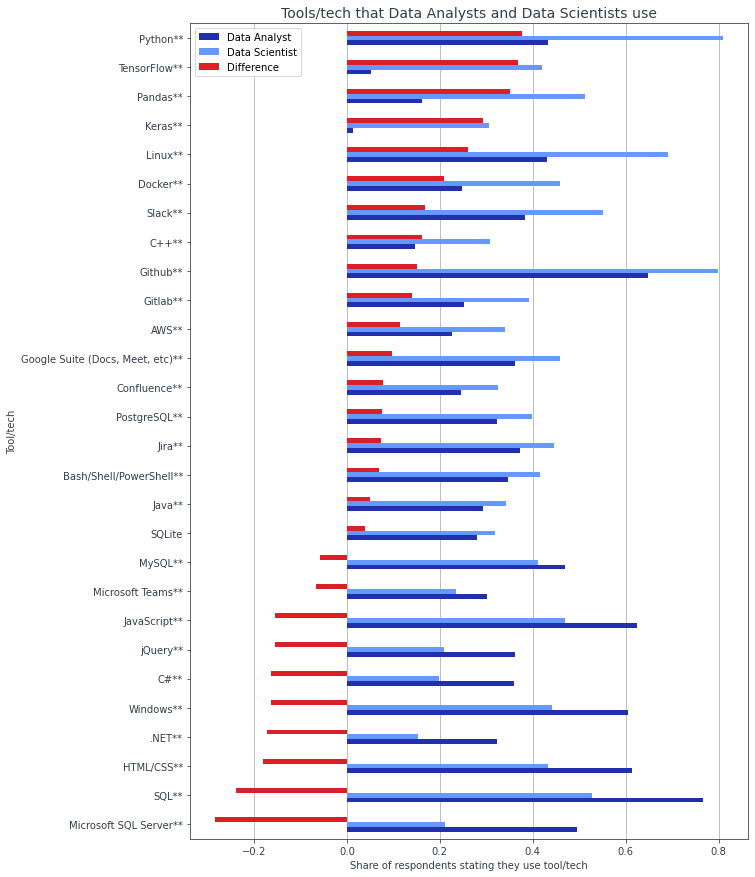

In [81]:
plotting(dfs_cooc3, 'DA_only_share', 'DS_only_share', 'Tool/tech', 'Share of respondents stating they use tool/tech',
         'Tools/tech that Data Analysts and Data Scientists use', 'Data Analyst', 'Data Scientist')

##### Analysis for 2-way split with partial overlap (DA, DS)

In [82]:
# Creating co-occurence table
dfs_cooc4_da = grouping(dfs_tools, all_tools, 'Data or business analyst', True)
dfs_cooc4_ds = grouping(dfs_tools, all_tools,
                        'Data scientist or machine learning specialist', True)
dfs_cooc4 = merging_2col(dfs_cooc4_da, dfs_cooc4_ds)

# Adding a difference column
dfs_cooc4 = diffcol_2col(dfs_cooc4)

# Removing tools with low endorsement
dfs_cooc4 = endorsement(0.3, dfs_cooc4, 'Data or business analyst',
                        'Data scientist or machine learning specialist')

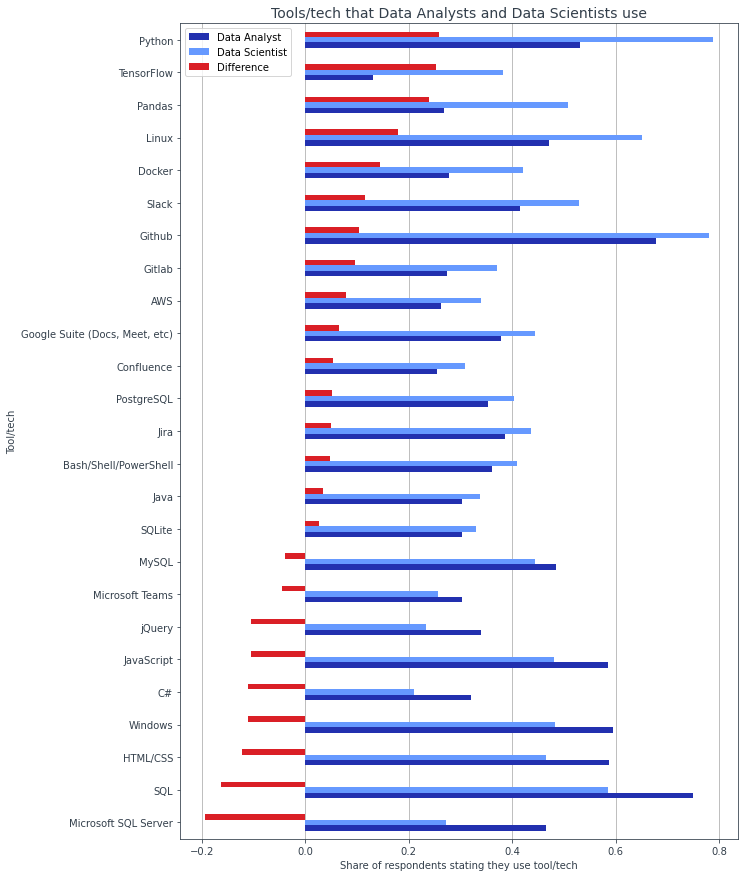

In [83]:
plotting(dfs_cooc4, 'Data or business analyst', 'Data scientist or machine learning specialist', 'Tool/tech',
         'Share of respondents stating they use tool/tech', 'Tools/tech that Data Analysts and Data Scientists use', 'Data Analyst', 'Data Scientist')

## Question 2.3: Do tools that Data Analysts and Data Scientists want to use next year differ?

In [84]:
# Listing all columns that refer to tech and tools variables FOR LEARNING
column_list_dny = ['MiscTechDesireNextYear',
                   'LanguageDesireNextYear',
                   'NEWCollabToolsDesireNextYear',
                   'DatabaseDesireNextYear',
                   'PlatformDesireNextYear',
                   'WebframeDesireNextYear']

In [85]:
# Creating columns in df for all tools
dfs_tools_dny, issue_list_dny = dummies(dfs, column_list_dny)

In [86]:
# Creating list with all tools
all_tools_dny = subset_creator(dfs_tools_dny, column_list_dny)

##### Analysis for 3-way split (DA only, DS only, DA and DS)

Creating grouped co-occurence table

In [87]:
# Creating a co-occurence table
dfs_cooc5 = grouping_1col('Stackoverflow', dfs_tools_dny,
                          'DevType_RoleDescription', all_tools_dny, n_dicts)

Heatmap

In [88]:
'''
# Plotting the table using a heatmap
plt.figure(figsize=(10, 40))
ax = sns.heatmap(dfs_cooc5[['DA_only_share', 'DS_only_share', 'DA_and_DS_share']].sort_values(
    by=['DA_only_share']), annot=True, fmt='.2f')
# ax.set_ylim(0,100);
'''

"\n# Plotting the table using a heatmap\nplt.figure(figsize=(10, 40))\nax = sns.heatmap(dfs_cooc5[['DA_only_share', 'DS_only_share', 'DA_and_DS_share']].sort_values(\n    by=['DA_only_share']), annot=True, fmt='.2f')\n# ax.set_ylim(0,100);\n"

Removing variables with low endorsement

In [89]:
dfs_cooc5 = endorsement(0.3, dfs_cooc5, 'DA_only_share', 'DS_only_share')

Sig testing

In [90]:
dfs_result_tools_dny, dfs_result_tools_dny_ba, sig_dvar_s_dny_tools = t_testing(
    dfs_cooc5, list(dfs_cooc5.index), 'DA_only_share', 'DS_only_share', n_da_only, n_ds_only, [])

Adding sig-stars to table pre-charting

In [91]:
dfs_cooc5 = sig_stars(dfs_cooc5, sig_dvar_s_dny_tools)

Charting

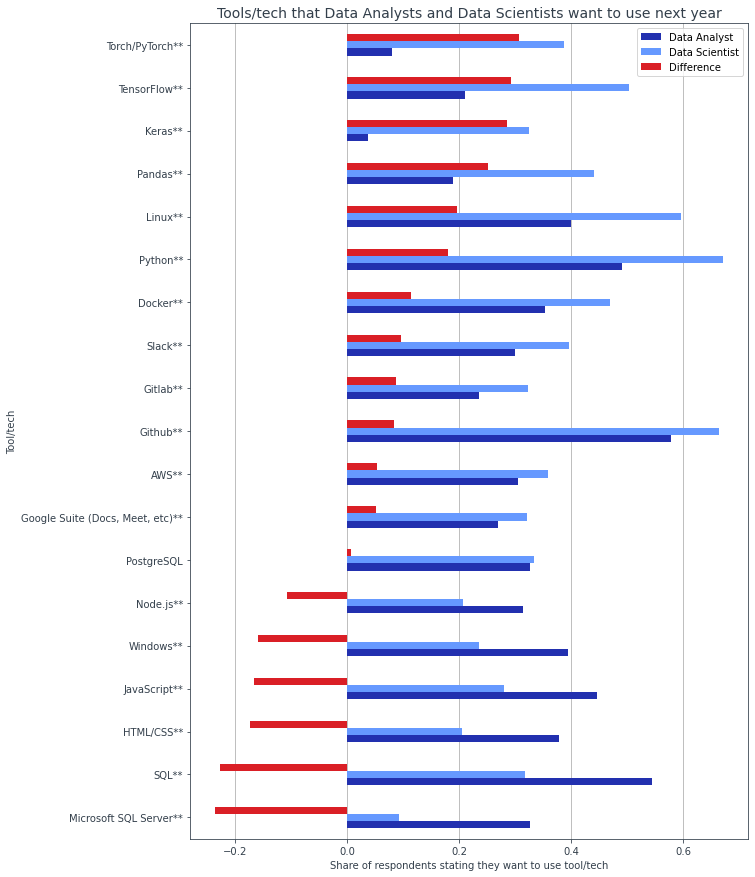

In [92]:
plotting(dfs_cooc5, 'DA_only_share', 'DS_only_share', 'Tool/tech', 'Share of respondents stating they want to use tool/tech',
         'Tools/tech that Data Analysts and Data Scientists want to use next year', 'Data Analyst', 'Data Scientist')

##### Analysis for 2-way split with partial overlap (DA, DS)

In [93]:
# Creating co-occurence table
dfs_cooc6_da = grouping(dfs_tools_dny, all_tools_dny,
                        'Data or business analyst', True)
dfs_cooc6_ds = grouping(dfs_tools_dny, all_tools_dny,
                        'Data scientist or machine learning specialist', True)
dfs_cooc6 = merging_2col(dfs_cooc6_da, dfs_cooc6_ds)

# Adding a difference column
dfs_cooc6 = diffcol_2col(dfs_cooc6)

# Removing tools with low endorsement
dfs_cooc6 = endorsement(0.3, dfs_cooc6, 'Data or business analyst',
                        'Data scientist or machine learning specialist')

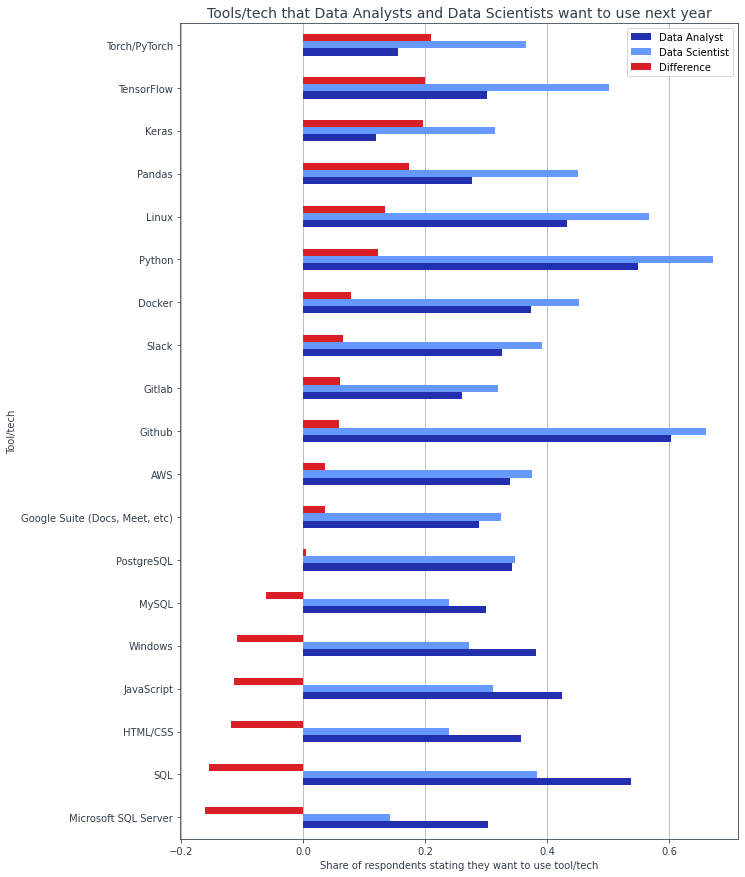

In [94]:
plotting(dfs_cooc6, 'Data or business analyst', 'Data scientist or machine learning specialist', 'Tool/tech', 'Share of respondents stating they want to use tool/tech',
         'Tools/tech that Data Analysts and Data Scientists want to use next year', 'Data Analyst', 'Data Scientist')

# Part 2 - The Kaggle Job Data

## Inspecting data

In [95]:
dfk.head()

Unnamed: 0  index                          Job Title  \
0           0      0              Senior Data Scientist   
1           1      1  Data Scientist, Product Analytics   
2           2      2               Data Science Manager   
3           3      3                       Data Analyst   
4           4      4             Director, Data Science   

                Salary Estimate  \
0  $111K-$181K (Glassdoor est.)   
1  $111K-$181K (Glassdoor est.)   
2  $111K-$181K (Glassdoor est.)   
3  $111K-$181K (Glassdoor est.)   
4  $111K-$181K (Glassdoor est.)   

                                     Job Description  Rating  \
0  ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...     3.5   
1  At Noom, we use scientifically proven methods ...     4.5   
2  Decode_M\n\nhttps://www.decode-m.com/\n\nData ...    -1.0   
3  Sapphire Digital seeks a dynamic and driven mi...     3.4   
4  Director, Data Science - (200537)\nDescription...     3.4   

                      Company Name       Location      Headquarters  \
0                      Hopper\n3.5   New York, NY  Montreal, Canada   
1                     Noom US\n4.5   New York, NY      New York, NY   
2                         Decode_M   New York, NY      New York, NY   
3            Sapphire Digital\n3.4  Lyndhurst, NJ     Lyndhurst, NJ   
4  United Entertainment Group\n3.4   New York, NY      New York, NY   

                     Size  Founded  Type of ownership  \
0   501 to 1000 employees     2007  Company - Private   
1  1001 to 5000 employees     2008  Company - Private   
2       1 to 50 employees       -1            Unknown   
3    201 to 500 employees     2019  Company - Private   
4     51 to 200 employees     2007  Company - Private   

                    Industry                  Sector  \
0            Travel Agencies        Travel & Tourism   
1  Health, Beauty, & Fitness       Consumer Services   
2                         -1                      -1   
3                   Internet  Information Technology   
4    Advertising & Marketing       Business Services   

                    Revenue               Competitors Easy Apply  
0  Unknown / Non-Applicable                        -1         -1  
1  Unknown / Non-Applicable                        -1         -1  
2  Unknown / Non-Applicable                        -1       True  
3  Unknown / Non-Applicable      Zocdoc, Healthgrades         -1  
4  Unknown / Non-Applicable  BBDO, Grey Group, Droga5         -1

In [96]:
# Checking for base size
dfk.shape

(3909, 17)

In [97]:
# Checking for missing data
dfk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size               3909 non-null   object 
 10  Founded            3909 non-null   int64  
 11  Type of ownership  3909 non-null   object 
 12  Industry           3909 non-null   object 
 13  Sector             3909 non-null   object 
 14  Revenue            3909 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3909 

## Creating comprehensive list of tools

Sources: 
* Tools listed in Stackoverflow survey
* Top BI, statistical software & data visualisation tools as found online: (Note: There is a plethora of tools out there. After some research I came up with the list below which contains, to my knowledge, all currently highly popular tools plus some more I am myself unfamiliar with. In the analysis, any tools that have low incidence will be removed)
    * https://www.datapine.com/articles/best-bi-tools-software-review-list
     * Datapine
     * SAS
     * Clear Analytics
     * SAP
     * Domo
     * Metric Insights
     * Zoho Analytics
     * Microstrategy
     * Gooddata
     * Cognos Analytics (by IBM)
     * QlikView
     * Yellowfin
    * https://towardsdatascience.com/top-5-bi-tools-that-you-must-use-for-data-visualization-7ccc2a852bd3
     * Qlik Sense
     * Tableau
     * Power BI (by Microsoft)
     * SAP Hana
    * https://www.cio.com/article/3322749/top-business-intelligence-bi-tools.html
     * Board (remove as potentially confusing word)
     * Dundas BI
     * MicroStrategy
     * Oracly Analytics Cloud
     * Sisense
     * Tibco
    * https://www.forbes.com/sites/bernardmarr/2020/05/22/the-9-best-analytics-tools-for-data-visualization-available-today/?sh=36ebb06a4743
     * Infogram
     * Google Charts
     * Paraview
     * Looker
    * https://uk.pcmag.com/cloud-services/83744/the-best-data-visualization-tools-for-2020
     * Google Analytics
    * https://mopinion.com/business-intelligence-bi-tools-overview/
     * Oracle BI
    * https://www.trustradius.com/business-intelligence-bi
     * SAP Analytics Cloud
    * Selection of https://www.capterra.com/statistical-analysis-software/
     * SPSS
     * Stata
     * Minitab
     * Matlab
     * Alteryx
     * Google DataStudio
* Excel
* Adding other names of tools in list, e.g. abbreviations of names (e.g. GCP = Google Cloud Platform)

In [98]:
online_research_list = ['Datapine',
                        'SAS',
                        'Clear Analytics',
                        'SAP',
                        'Domo',
                        'Metric Insights',
                        'Zoho Analytics',
                        'Microstrategy',
                        'GoodData',
                        'Cognos Analytics',
                        'QlikView',
                        'Yellowfin',
                        'Qlik Sense',
                        'Tableau',
                        'Power BI',
                        'SAP Hana',
                        'Dundas BI',
                        'MicroStrategy',
                        'Oracle Analytics Cloud',
                        'Sisense',
                        'Tibco',
                        'Infrogram',
                        'Google Charts',
                        'Paraview',
                        'Looker',
                        'Google Analytics',
                        'Oracle BI',
                        'SAP Analytics Cloud',
                        'SPSS',
                        'Stata',
                        'Minitab',
                        'Matlab',
                        'Alteryx',
                        'Data Studio']

In [99]:
# Retrieving all DevTypes from the Stackoverflow data
all_tools = subset_creator(dfs_tools, column_list)

In [100]:
# Compiling a comprehensive list without duplicates, sorted
full_list = all_tools + online_research_list + ['Excel', 'MS Office'] + ['Workplace', 'Azure', 'Bash', 'Shell', 'PowerShell', 'IBM Cloud',
                                                                         'IBM Watson', 'Google Suite', 'Slack', 'SQL Server', 'GCP', 'Torch', 'PyTorch', 'Amazon Web Services', 'Visual Basic', 'PowerBI']
full_list = list(set(full_list))
full_list = sorted(full_list, key=lambda x: x.upper())

In [101]:
full_list

['.NET',
 '.NET Core',
 'Alteryx',
 'Amazon Web Services',
 'Android',
 'Angular',
 'Angular.js',
 'Ansible',
 'Apache Spark',
 'Arduino',
 'ASP.NET',
 'ASP.NET Core',
 'Assembly',
 'AWS',
 'Azure',
 'Bash',
 'Bash/Shell/PowerShell',
 'C',
 'C#',
 'C++',
 'Cassandra',
 'Chef',
 'Clear Analytics',
 'Cognos Analytics',
 'Confluence',
 'Cordova',
 'Couchbase',
 'Dart',
 'Data Studio',
 'Datapine',
 'Django',
 'Docker',
 'Domo',
 'Drupal',
 'Dundas BI',
 'DynamoDB',
 'Elasticsearch',
 'Excel',
 'Express',
 'Facebook Workplace',
 'Firebase',
 'Flask',
 'Flutter',
 'Gatsby',
 'GCP',
 'Github',
 'Gitlab',
 'Go',
 'GoodData',
 'Google Analytics',
 'Google Charts',
 'Google Cloud Platform',
 'Google Suite',
 'Google Suite (Docs, Meet, etc)',
 'Hadoop',
 'Haskell',
 'Heroku',
 'HTML/CSS',
 'IBM Cloud',
 'IBM Cloud or Watson',
 'IBM DB2',
 'IBM Watson',
 'Infrogram',
 'iOS',
 'Java',
 'JavaScript',
 'Jira',
 'jQuery',
 'Julia',
 'Keras',
 'Kotlin',
 'Kubernetes',
 'Laravel',
 'Linux',
 'Looker',


In [102]:
# Creating dictionary with all pairs (e.g. AWS = Amazon Web Services)
pair_dict = {'AWS': 'Amazon Web Services',
             'Azure': 'Microsoft Azure',
             'Microsoft SQL Server': 'SQL Server',
             'Workplace': 'Facebook Workplace',
             'Bash': 'Shell',
             'Bash': 'PowerShell',
             'Google Cloud Platform': 'GCP',
             'VBA': 'Visual Basic',
             'Power BI': 'PowerBI'
             }

In [103]:
# Dropping items that were completely replaced/split up (e.g. IBM Cloud or Watson >> IBM Cloud; IBM Watson)
removal_list = ['Slack Apps and Integrations',
                'IBM Cloud or Watson',
                'Bash/Shell/PowerShell',
                'Google Suite (Docs, Meet, etc)',
                'Torch/Pytorch']
full_list = [i for i in full_list if i not in removal_list]

## Filtering

**Sensible Filters**

**Job Title**: Only job titles that contain the key descriptions: Data Analyst, Business Intelligence Analyst, Business Analyst, Data Scientist, Machine Learning Specialist

In [104]:
# Reducing the dataset to jobs that contain "Data Scientist" or "Data Analyst"
dfk_f = dfk.loc[dfk['Job Title'].str.contains(
    r'Data Analyst|Business Intelligence Analyst|Business Analyst|Data Scientist|Machine Learning Specialist')]

In [105]:
# Checking new base size
dfk_f.shape

(1794, 17)

## Marking job postings as Data Analyst or Data Scientist postings

In [106]:
# Adding binary identifiers for Data Analyst and Data Scientist
dfk_f['Data or business Analyst'] = 0
dfk_f.loc[dfk_f['Job Title'].str.contains(
    r'Data Analyst|Business Intelligence Analyst|Business Analyst'), 'Data or business Analyst'] = 1

dfk_f['Data scientist or machine learning specialist'] = 0
dfk_f.loc[dfk_f['Job Title'].str.contains(
    r'Data Scientist|Machine Learning Specialist'), 'Data scientist or machine learning specialist'] = 1

C:\Users\j\Python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\j\Python\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\j\Python\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [107]:
# Checking if there is overlap
dfk_f['Both job titles'] = dfk_f['Data or business Analyst'] + \
    dfk_f['Data scientist or machine learning specialist']
dfk_f['Both job titles'].value_counts()

C:\Users\j\Python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1    1791
2       3
Name: Both job titles, dtype: int64

In [108]:
# Removing ambiguous job titles (losing 3 rows >> minimal loss)
dfk_f = dfk_f.loc[dfk_f['Both job titles'] == 1]

In [109]:
# Creating column that identifies DA and DS jobs
dfk_f['Job Title Reduced'] = 'no information'
dfk_f.loc[dfk_f['Data or business Analyst'] == 1, 'Job Title Reduced'] = 'DA'
dfk_f.loc[dfk_f['Data scientist or machine learning specialist']
          == 1, 'Job Title Reduced'] = 'DS'

In [110]:
# Storing abse sizes for further analysis
n_da_k = dfk_f.loc[dfk_f['Job Title Reduced'] == 'DA']['index'].count()
n_ds_k = dfk_f.loc[dfk_f['Job Title Reduced'] == 'DS']['index'].count()

In [111]:
print("Base size DA: ", n_da_k)
print("Base size DS: ", n_ds_k)

Base size DA:  814
Base size DS:  977


## Creating columns for tech/tools (0/1 coded)

In [112]:
# Creating one column per tool
dfk_f[full_list] = np.nan

In [113]:
# Adding 1 for tool if mentioned in job description
# Test your regex: https://regexr.com/
for i in full_list:
    r1 = r"[\s.,;:/(]"
    r2 = r"[\s.,;:/)]"
    regex_string = re.compile(r1 + re.escape(i) + r2, re.IGNORECASE)
    dfk_f.loc[dfk_f['Job Description'].str.contains(regex_string), i] = 1

In [114]:
dfk_f = dfk_f.fillna(0)

In [115]:
# Merge columns from pair_list (e.g. AWS and Amazon Web Services) and drop superfluous columns
for key in pair_dict:
    dfk_f[key] = dfk_f[key] + dfk_f[pair_dict[key]]
    dfk_f = dfk_f.drop([pair_dict[key]], axis=1)
    dfk_f.loc[dfk_f[key] > 1, key] = 1

## Question 1.1: Do tool/tech requirements differ for Data Analysts and Data Scientists?

Creating grouped co-occurence table

In [116]:
# Creating dictionary for base sizes
n_dictk = {'DA': n_da_k, 'DS': n_ds_k}

In [117]:
# Adjusting full list
for key in pair_dict:
    full_list.remove(pair_dict[key])

In [118]:
dfk_cooc1 = grouping_1col(
    'Kaggle', dfk_f, 'Job Title Reduced', full_list, n_dictk)

Removing variables with low endorsement

In [119]:
min_end = 0.1  # adjust as desired
dfk_cooc1 = dfk_cooc1.loc[(dfk_cooc1['DA_share'] > min_end)
                          | (dfk_cooc1['DS_share'] > min_end)]

Sig-testing

In [120]:
dfk_result_tools, dfk_result_tools_ba, sig_dvar_k_tools = t_testing(
    dfk_cooc1, list(dfk_cooc1.index), 'DA_share', 'DS_share', n_da_k, n_ds_k, [])

Adding sig stars to table pre-charting

In [121]:
dfk_cooc1 = sig_stars(dfk_cooc1, sig_dvar_k_tools)

Charting

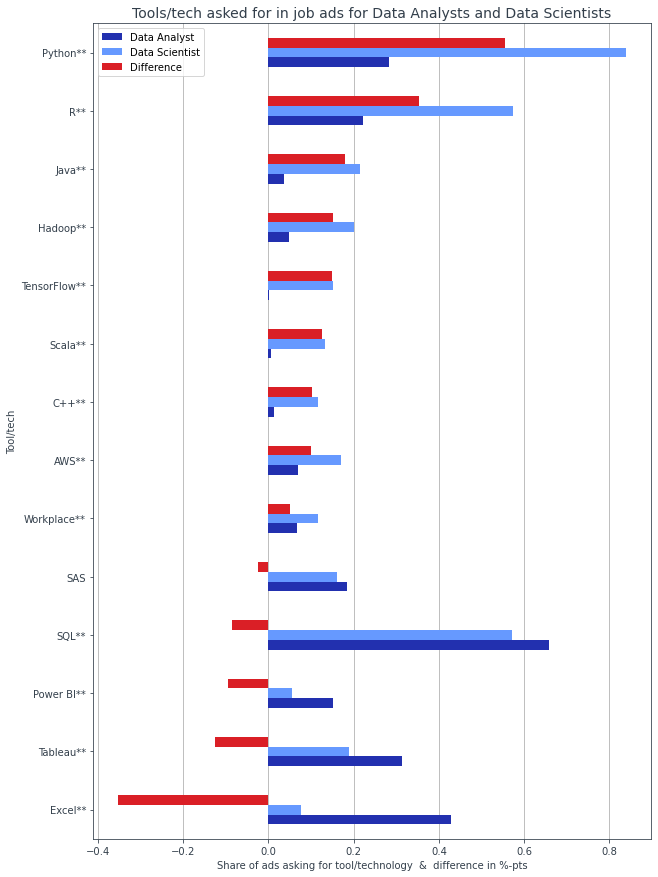

In [122]:
plotting(dfk_cooc1, 'DA_share', 'DS_share', 'Tool/tech', 'Share of ads asking for tool/technology  &  difference in %-pts',
         'Tools/tech asked for in job ads for Data Analysts and Data Scientists', 'Data Analyst', 'Data Scientist')